In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif'

In [3]:
# Replace this with the path to your Parquet file
file_path = r'C:\Users\200408\repos\HeroysundBridge-ML-Assets\bronze\heroysund_sensors\2020\09\20200907185322.parquet'

# Read the Parquet file into a Pandas DataFrame
data = pd.read_parquet(file_path)


display(data)

,Point_1_N,Point_2_N,Point_3_N,Point_4_S,Point_5_S,Point_6_S,Omega_N,Omega_S,PT100_Temperature
0,-36.320404,-45.308571,-38.159153,27.375505,22.367657,16.375565,-0.008955,0.009317,13.467153
1,-35.887760,-45.697952,-39.273209,28.797819,21.307680,17.078609,-0.009149,0.009272,13.470967
2,-35.660622,-47.109451,-39.911358,27.678354,22.016134,16.662191,-0.009212,0.009052,13.466729
3,-38.072609,-45.633053,-39.300251,27.429585,22.681322,16.526991,-0.009021,0.009192,13.459523
4,-37.461498,-45.914272,-38.862198,27.283567,22.324392,17.473398,-0.008965,0.009467,13.452318
...,...,...,...,...,...,...,...,...,...
4321074,-46.703842,-57.071064,-44.043102,16.105146,8.377053,4.991638,-0.001510,0.014970,12.014601
4321075,-46.146816,-56.330162,-44.281055,15.953721,8.604191,3.169128,-0.001453,0.014874,12.018840
4321076,-45.676315,-56.633011,-44.529827,16.905537,9.296420,4.093903,-0.001156,0.014828,12.026469
4321077,-47.606987,-57.563194,-45.633068,17.348995,9.117954,5.326936,-0.001582,0.014781,12.029012


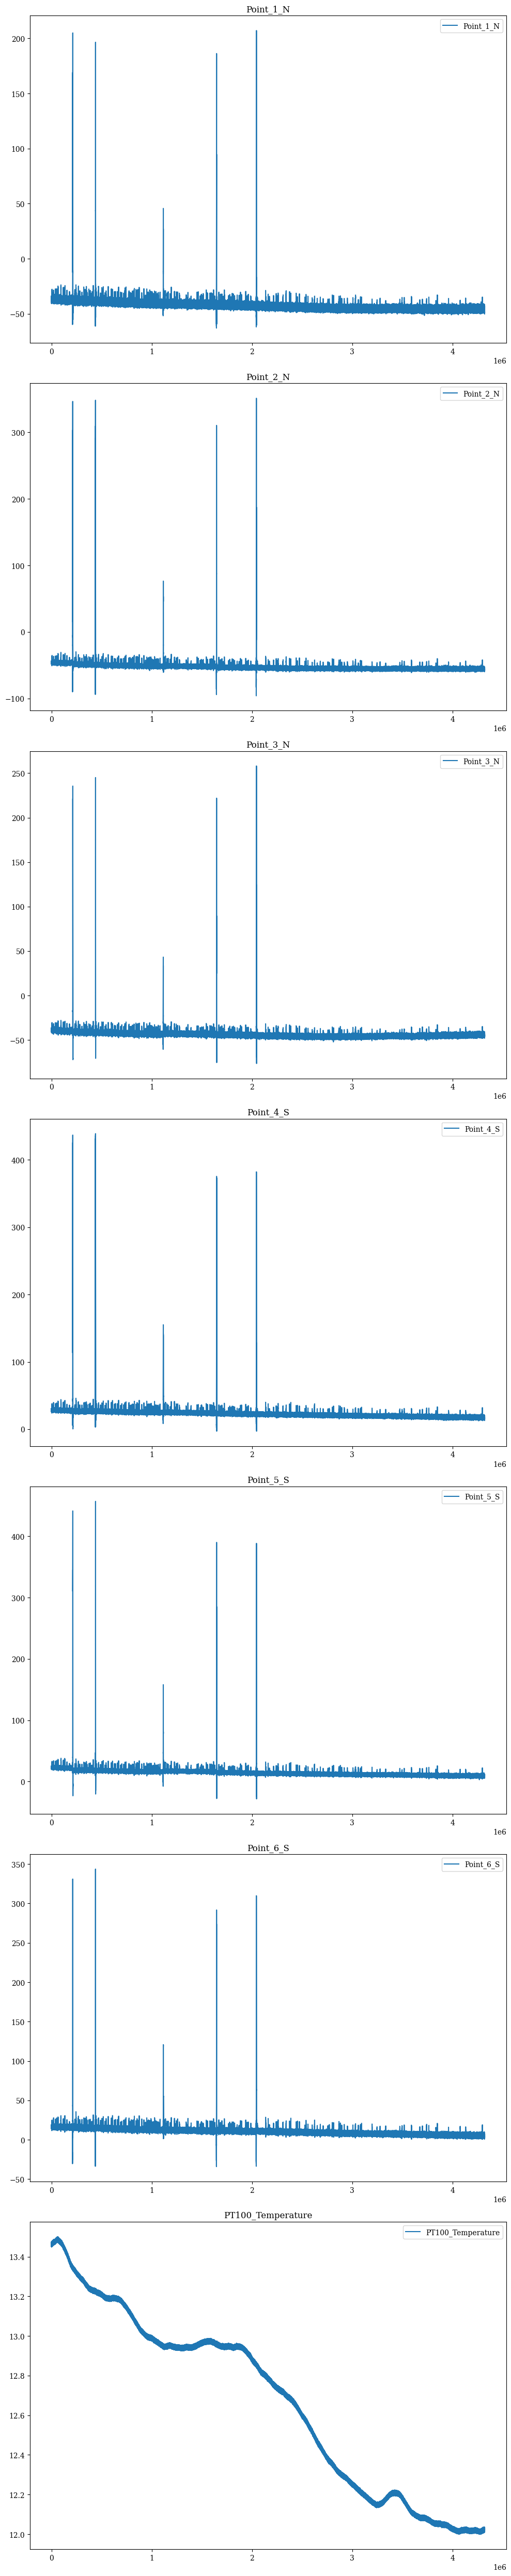

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Define the columns to plot, excluding 'Omega_N' and 'Omega_S' due to outlier values
columns_to_plot = ['Point_1_N', 'Point_2_N', 'Point_3_N', 'Point_4_S', 'Point_5_S', 'Point_6_S',
                   'PT100_Temperature']

# Setup the figure and subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 50))

for i, col in enumerate(columns_to_plot):
    axs[i].plot(data[col], label=col)
    axs[i].set_title(col)
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [5]:


# Compute the mean for the specified columns only
average_values = data[['Point_1_N', 'Point_2_N', 'Point_3_N', 'Point_4_S', 'Point_5_S', 'Point_6_S', 'Omega_N', 'Omega_S', 'PT100_Temperature']].mean()

# Create a new DataFrame to present the average values with specified column names
aggregated_df = pd.DataFrame([average_values], columns=average_values.index).rename(columns={
    'Point_1_N': 'Point_1_N_mean',
    'Point_2_N': 'Point_2_N_mean',
    'Point_3_N': 'Point_3_N_mean',
    'Point_4_S': 'Point_4_S_mean',
    'Point_5_S': 'Point_5_S_mean',
    'Point_6_S': 'Point_6_S_mean',
    'Omega_N': 'Omega_N_mean',
    'Omega_S': 'Omega_S_mean',
    'PT100_Temperature': 'PT100_Temperature_mean'
})

aggregated_df


,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean
0,-42.205988,-52.489637,-43.755446,22.882956,14.698154,10.869187,-0.00418,0.012644,12.669125


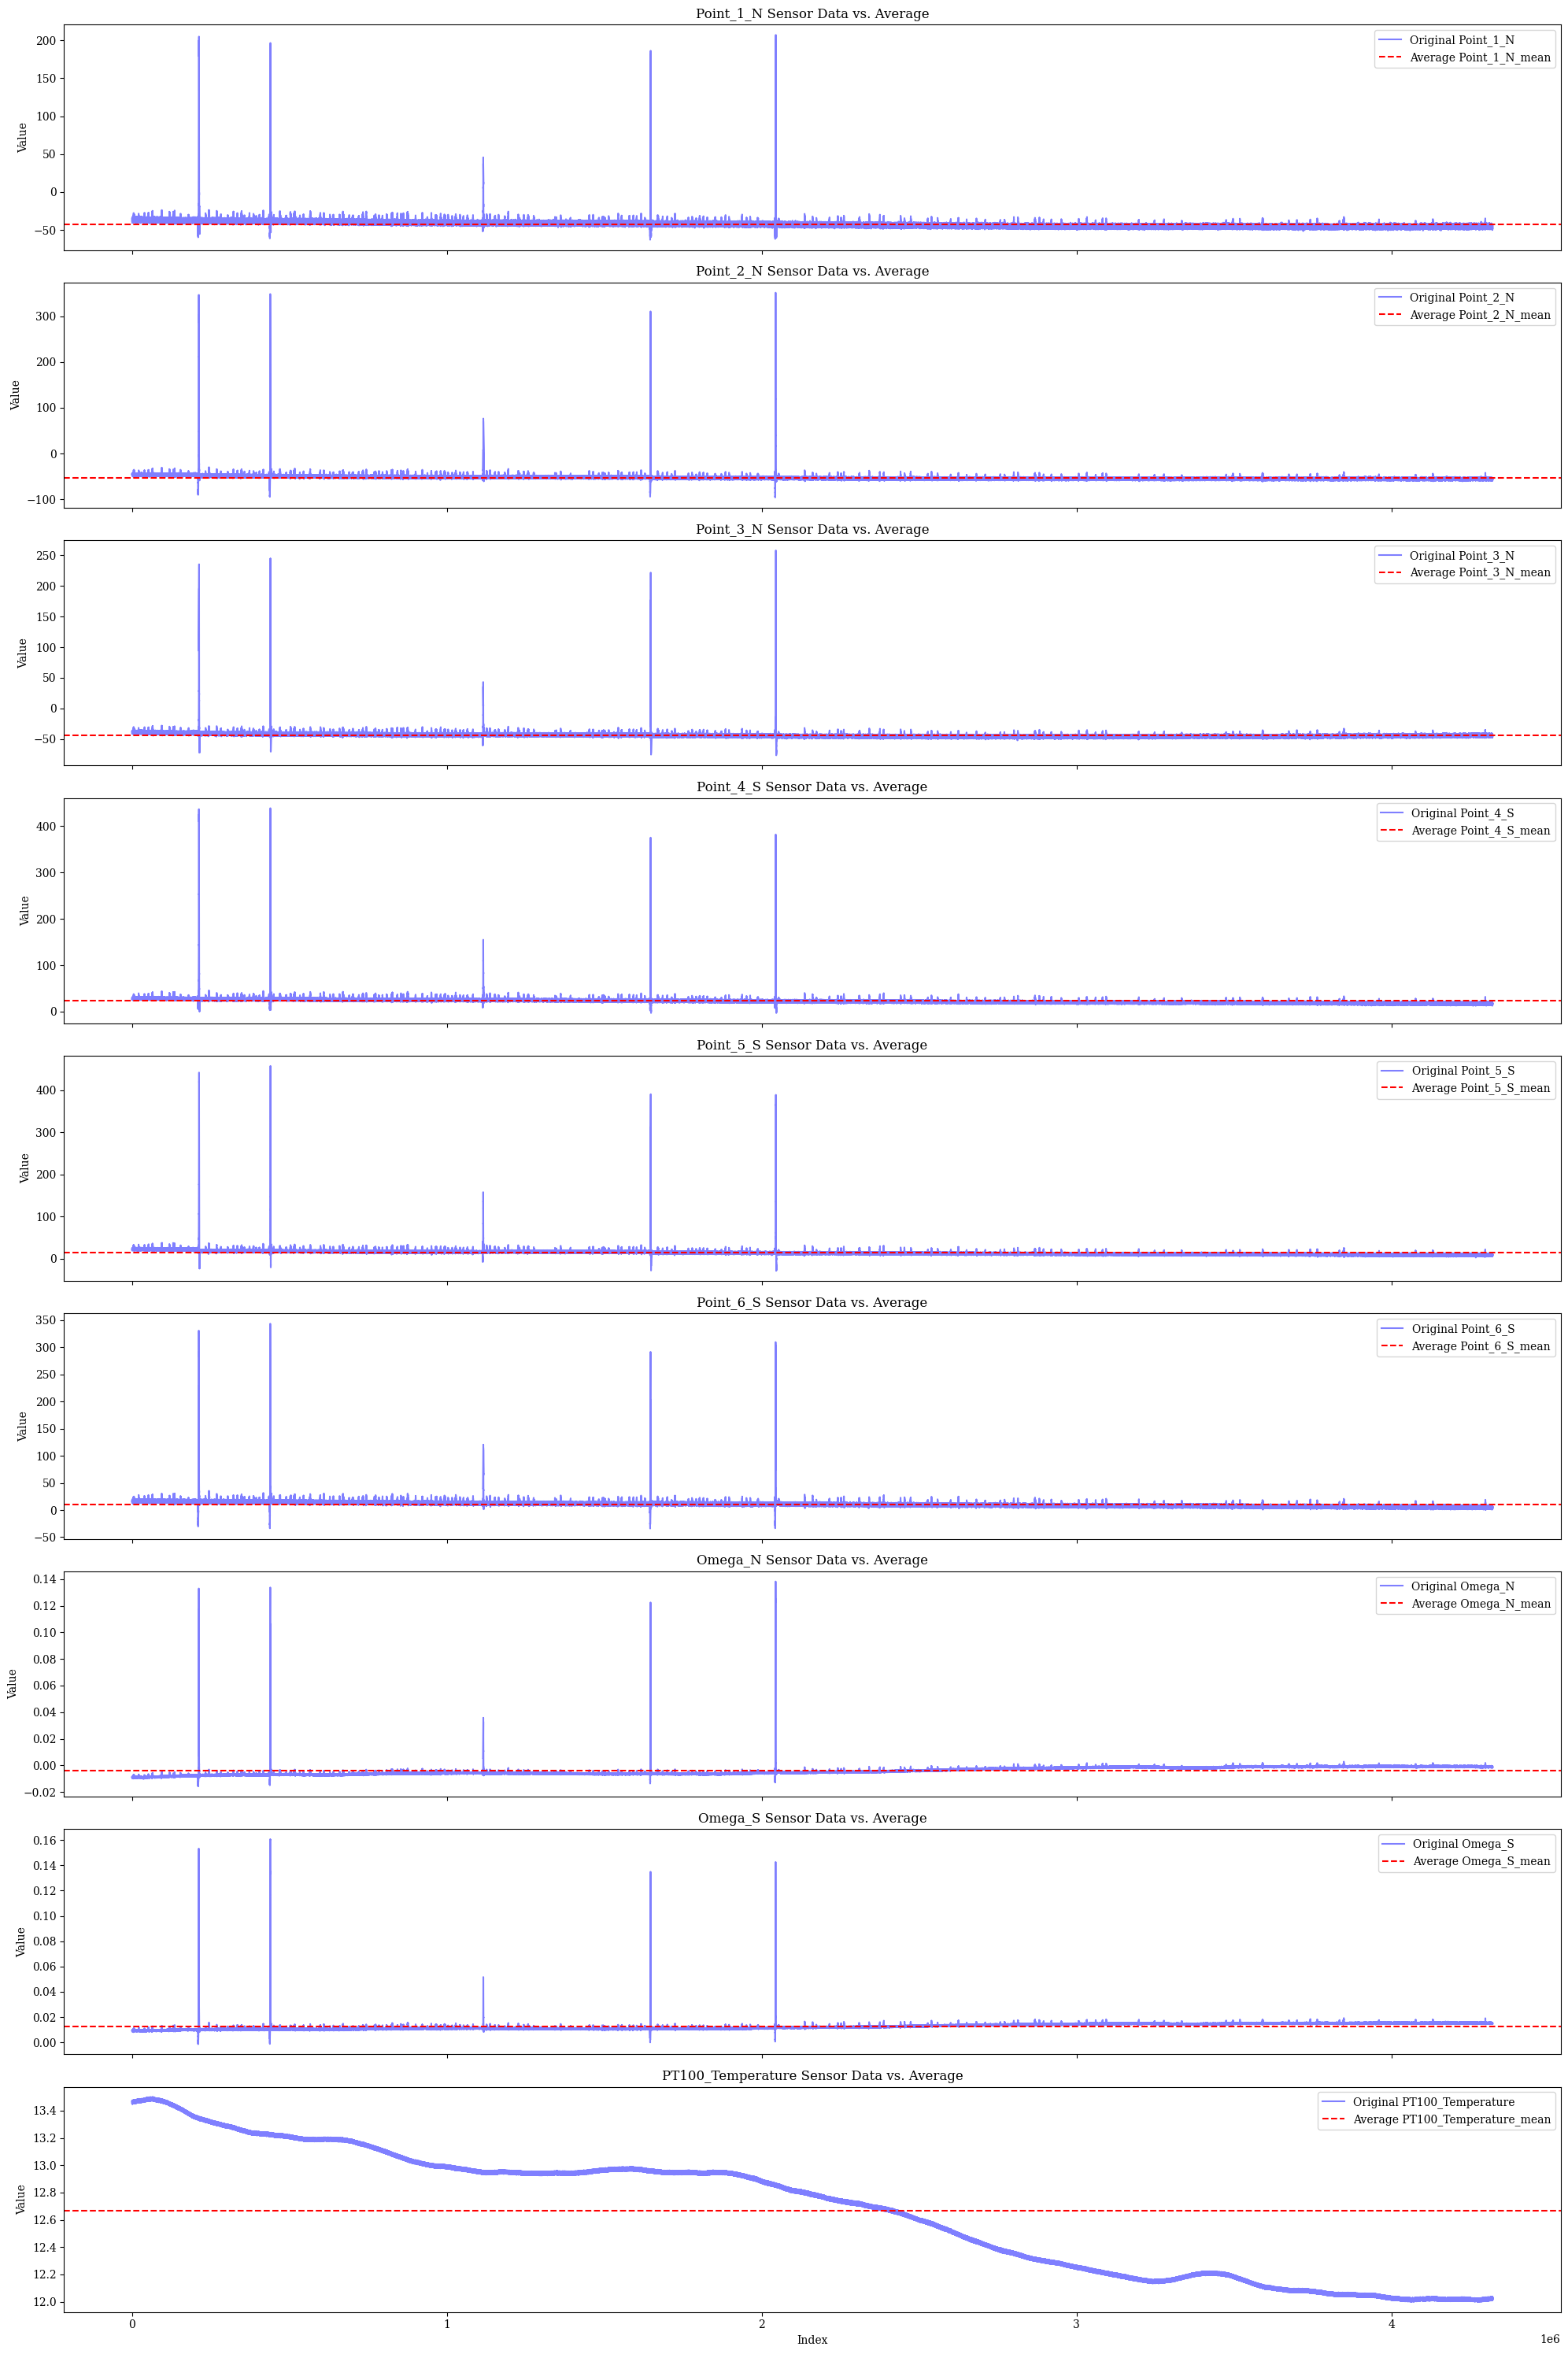

In [6]:
import matplotlib.pyplot as plt


# Prepare the plot
fig, axs = plt.subplots(len(aggregated_df.columns), 1, figsize=(20, 30), sharex=True)

for i, column in enumerate(aggregated_df.columns):
    # Extract the original column name without '_mean' to match with 'data' DataFrame
    original_column = column.replace('_mean', '')
    
    # Plot original data
    axs[i].plot(data.index, data[original_column], label=f'Original {original_column}', color='blue', alpha=0.5)
    
    # Plot average value as a horizontal line
    mean_value = aggregated_df[column].iloc[0]
    axs[i].axhline(y=mean_value, color='red', linestyle='--', label=f'Average {column}')
    
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].set_title(f'{original_column} Sensor Data vs. Average')

# Set common labels
plt.xlabel('Index')
plt.tight_layout()
plt.show()


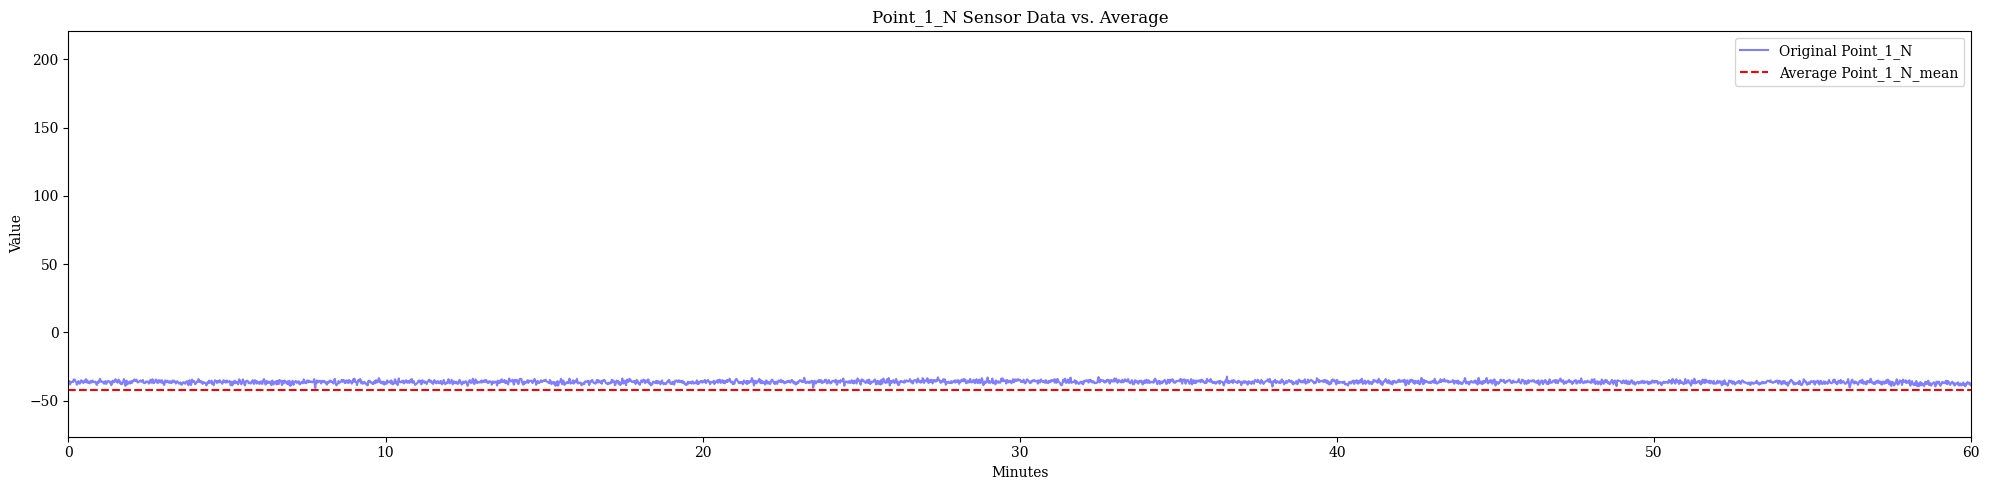

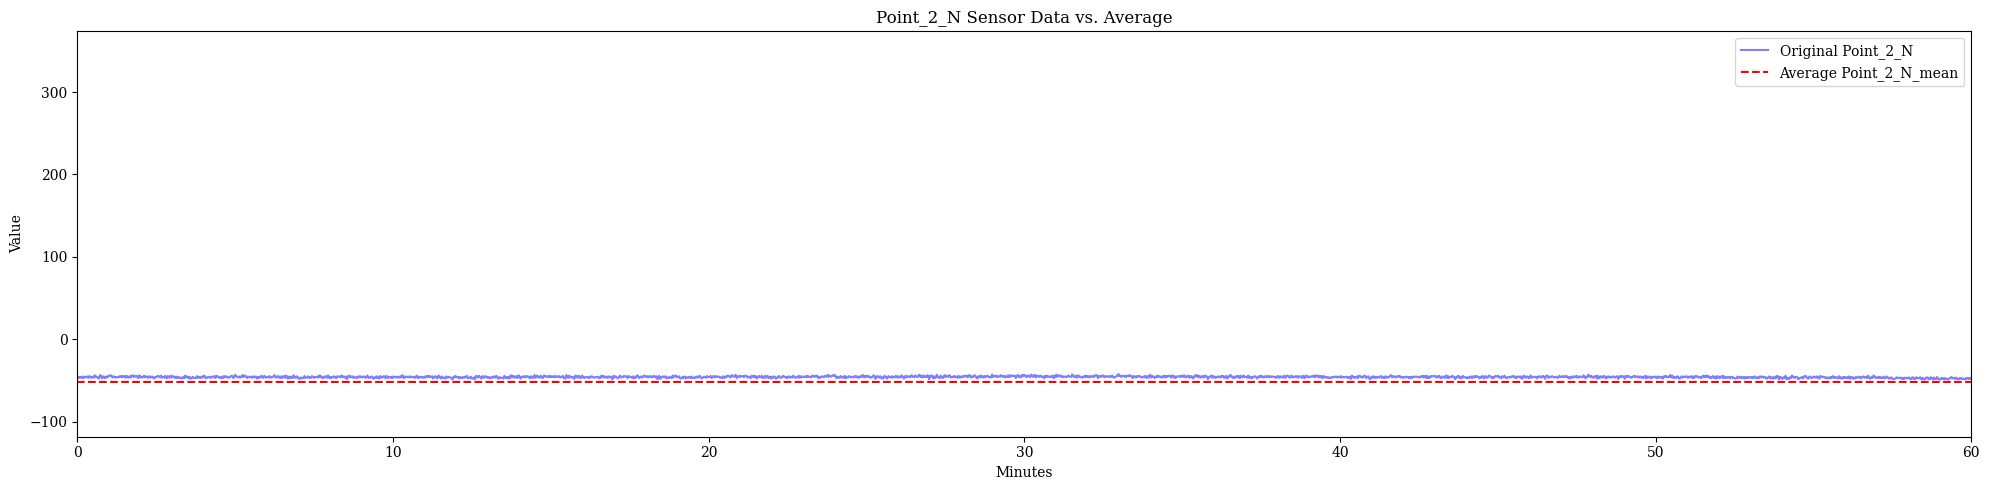

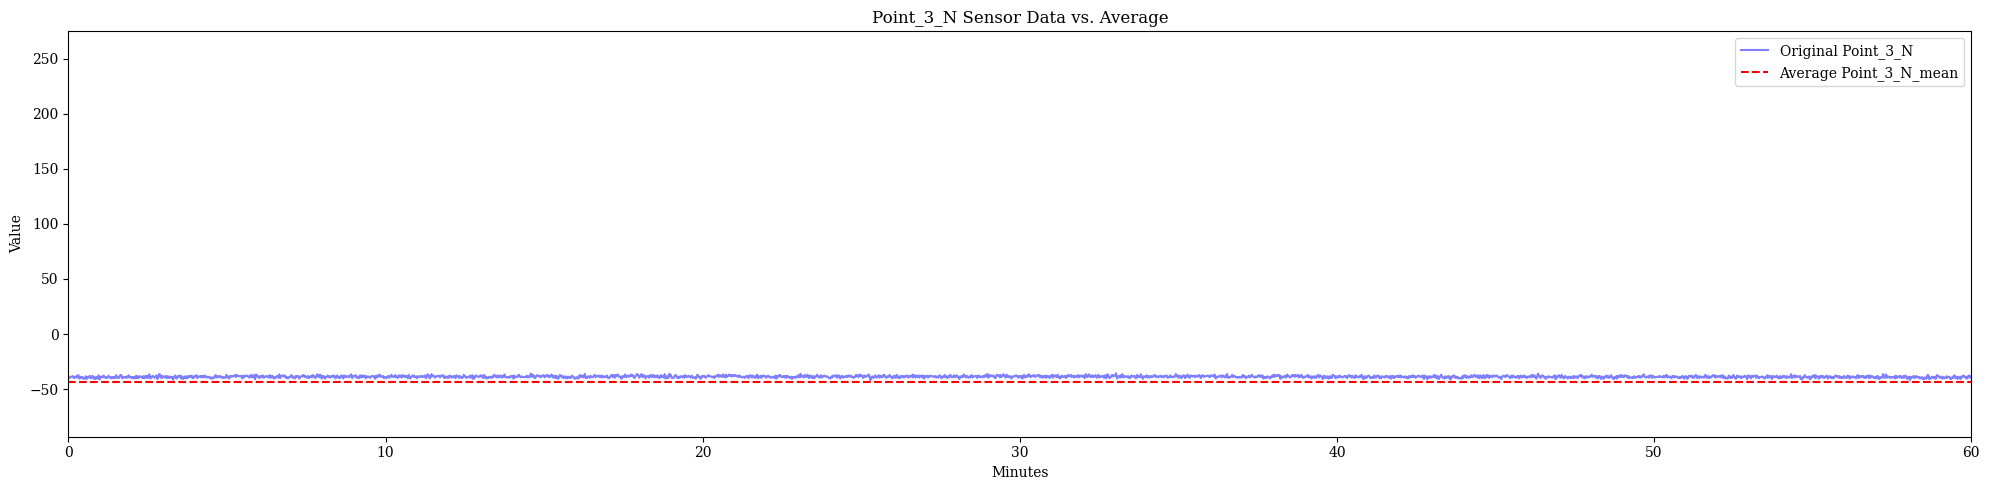

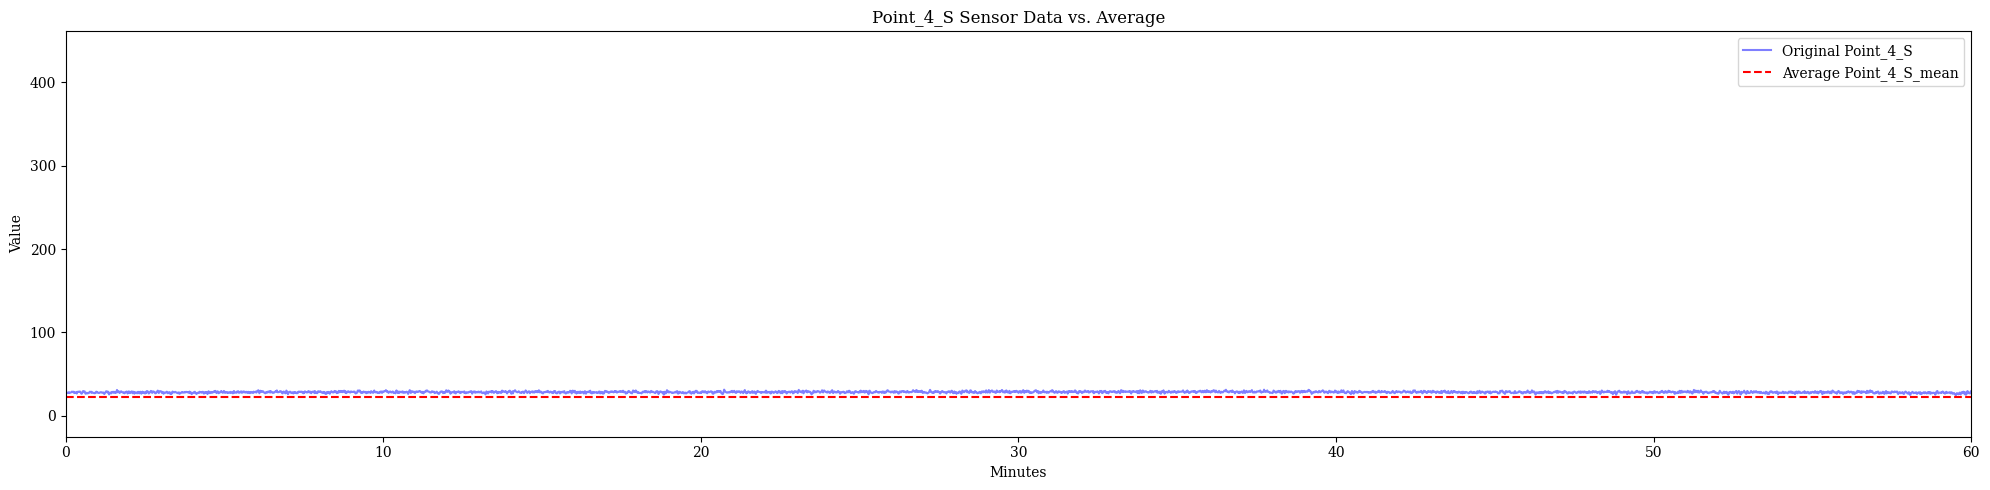

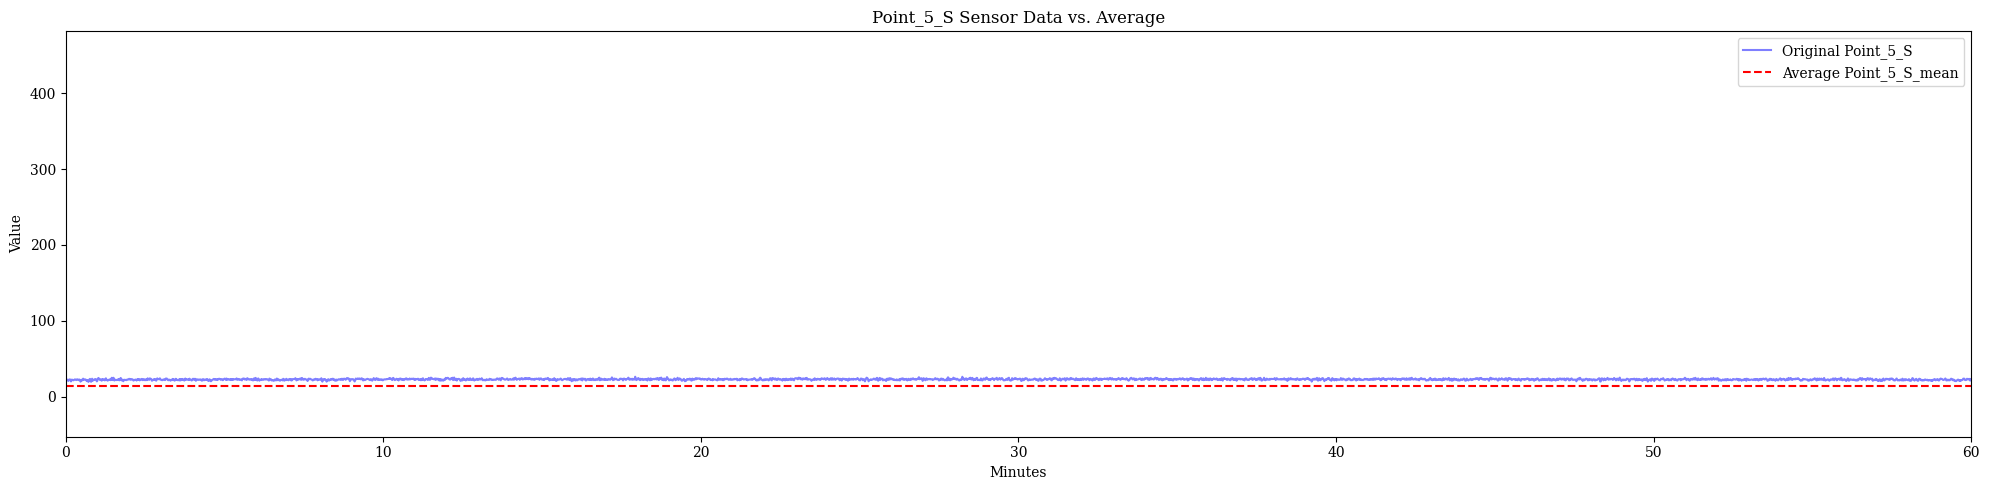

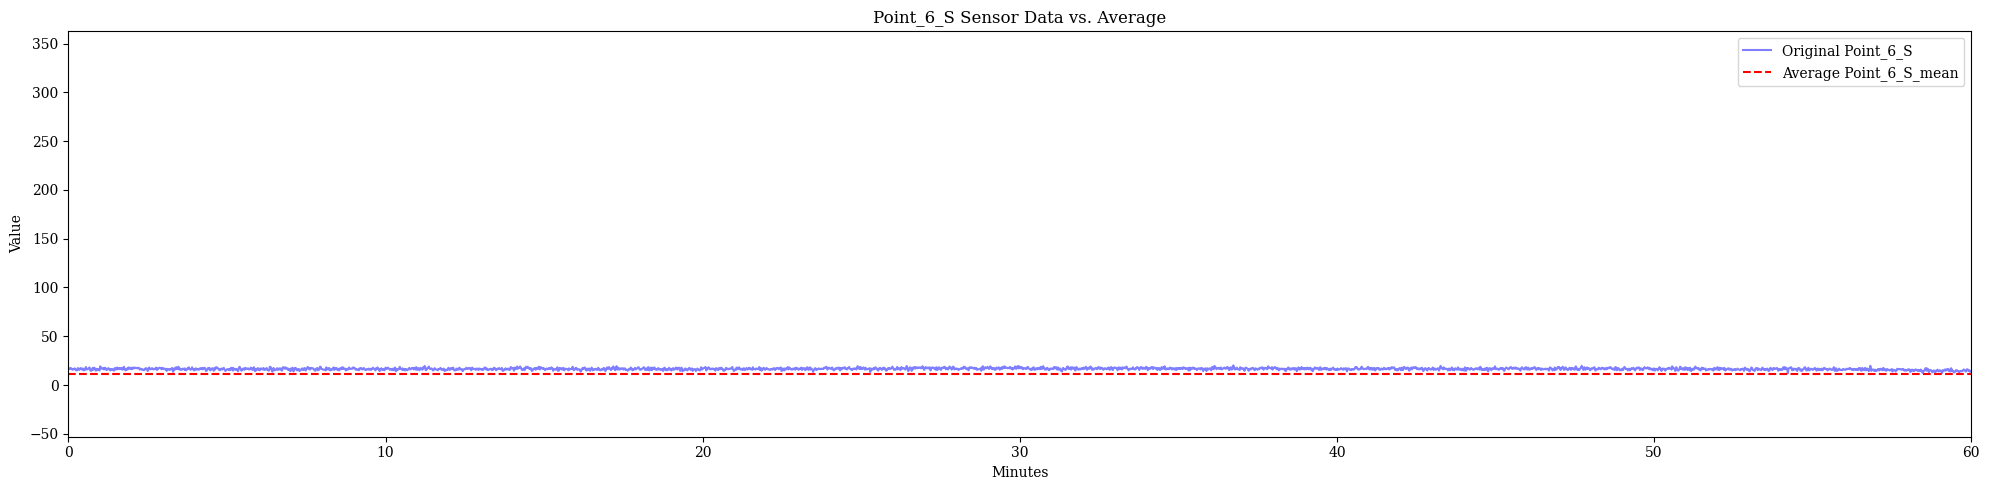

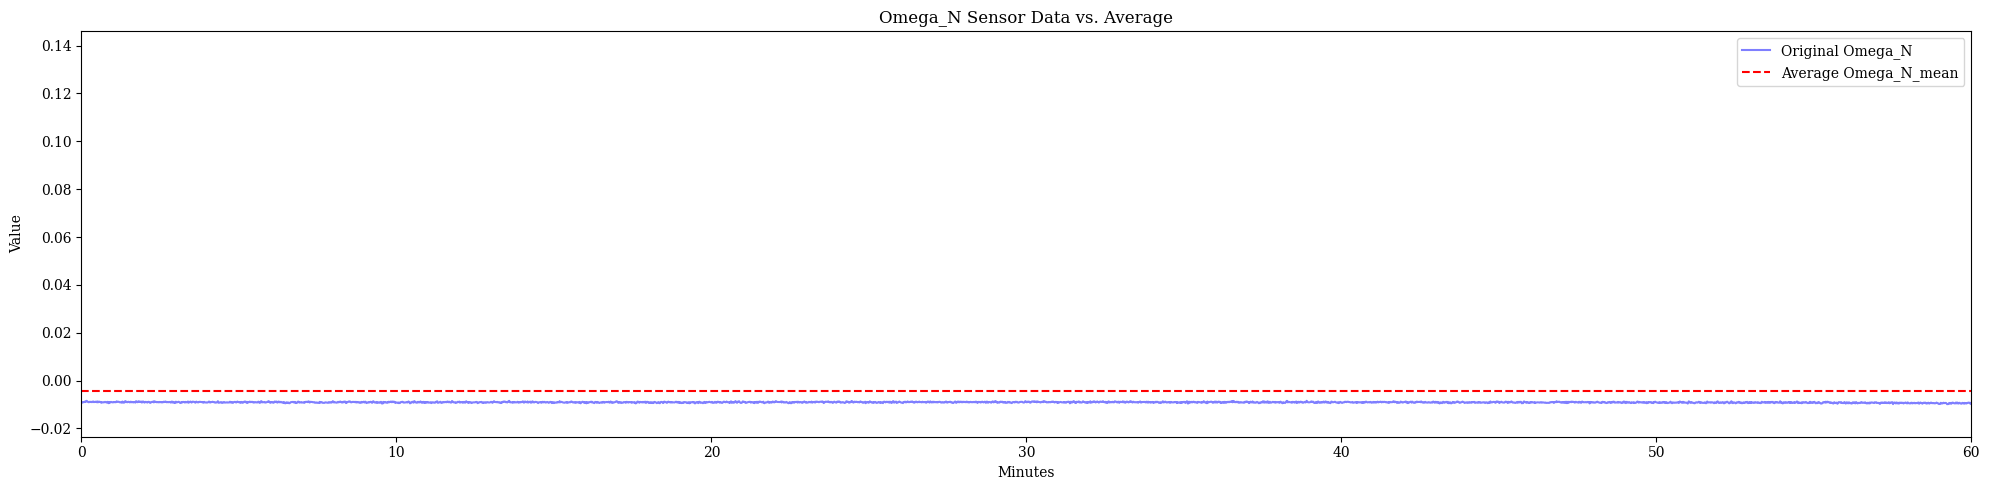

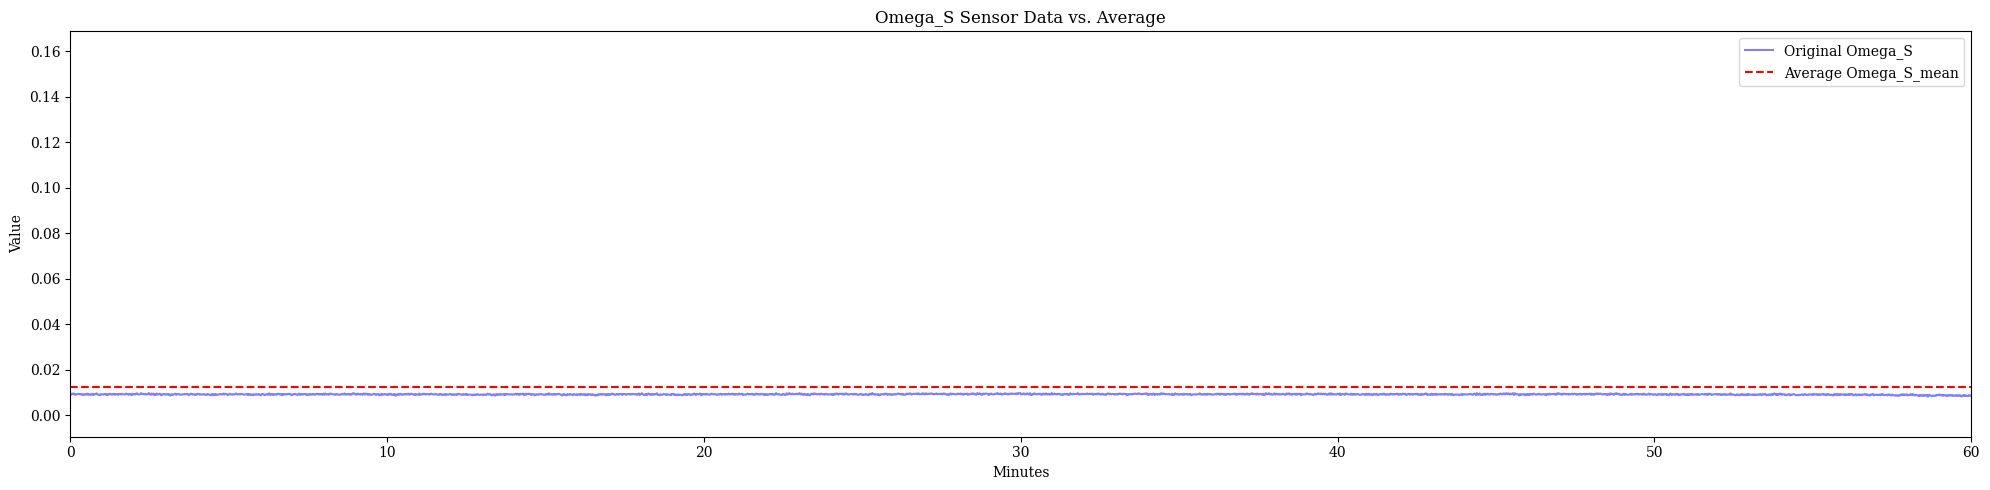

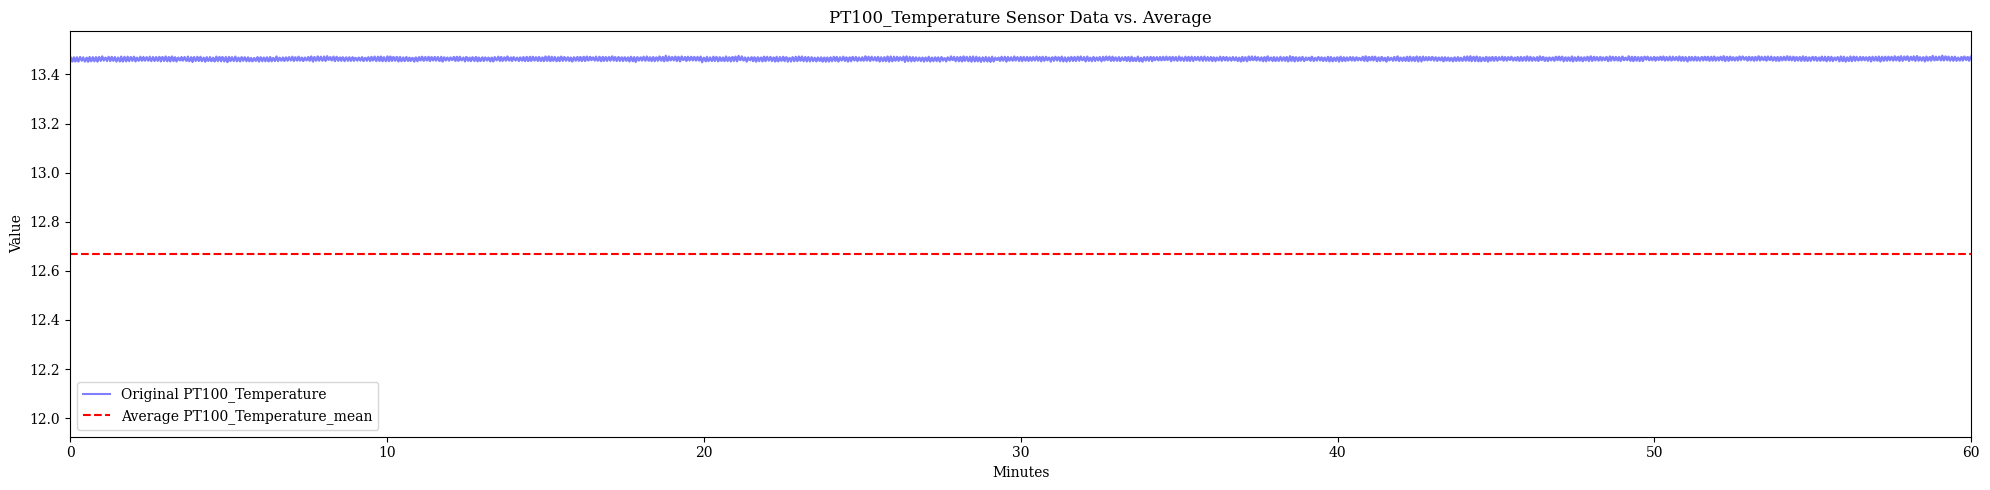

In [7]:
import matplotlib.pyplot as plt

for i, column in enumerate(aggregated_df.columns):
    # Prepare the plot
    fig, ax = plt.subplots(figsize=(20, 5))

    # Extract the original column name without '_mean' to match with 'data' DataFrame
    original_column = column.replace('_mean', '')
    
    # Convert index to minutes
    minutes = data.index / 60
    
    # Plot original data
    ax.plot(minutes, data[original_column], label=f'Original {original_column}', color='blue', alpha=0.5)
    
    # Plot average value as a horizontal line
    mean_value = aggregated_df[column].iloc[0]
    ax.axhline(y=mean_value, color='red', linestyle='--', label=f'Average {column}')
    
    ax.set_ylabel('Value')
    ax.legend()
    ax.set_title(f'{original_column} Sensor Data vs. Average')

    # Set common labels
    plt.xlabel('Minutes')
    ax.set_xlim([0, 60])  # Set x-axis limits to 0-60 minutes

    plt.tight_layout()
    plt.show()

,Point_1_N,Point_2_N,Point_3_N,Point_4_S,Point_5_S,Point_6_S,Omega_N,Omega_S,PT100_Temperature
0,-61.494835,-98.469620,-36.661125,-131.410004,-131.123383,-114.001503,0.386160,-0.013956,2.411313
1,-62.122169,-99.199707,-36.423172,-131.318069,-130.550125,-114.455772,0.386199,-0.014057,2.409617
2,-61.959927,-98.399315,-36.715206,-131.826416,-130.387878,-113.758141,0.386139,-0.013911,2.410465
3,-62.127579,-98.101875,-36.612453,-131.745300,-130.761032,-114.196190,0.386125,-0.013941,2.410041
4,-62.630524,-97.636780,-36.850407,-131.696625,-130.620422,-114.228638,0.386133,-0.013877,2.410889
...,...,...,...,...,...,...,...,...,...
72027,-75.955940,-107.165749,-54.047977,-129.279236,-128.154358,-109.902206,0.369726,-0.015146,2.936469
72028,-76.112770,-106.889938,-53.755943,-128.522110,-127.624374,-109.907616,0.369725,-0.015162,2.936469
72029,-75.782883,-107.117081,-53.517990,-129.246780,-127.959671,-110.053627,0.369637,-0.015139,2.936469
72030,-75.642273,-106.397812,-53.458504,-128.257111,-127.883957,-109.593948,0.369603,-0.015167,2.935198


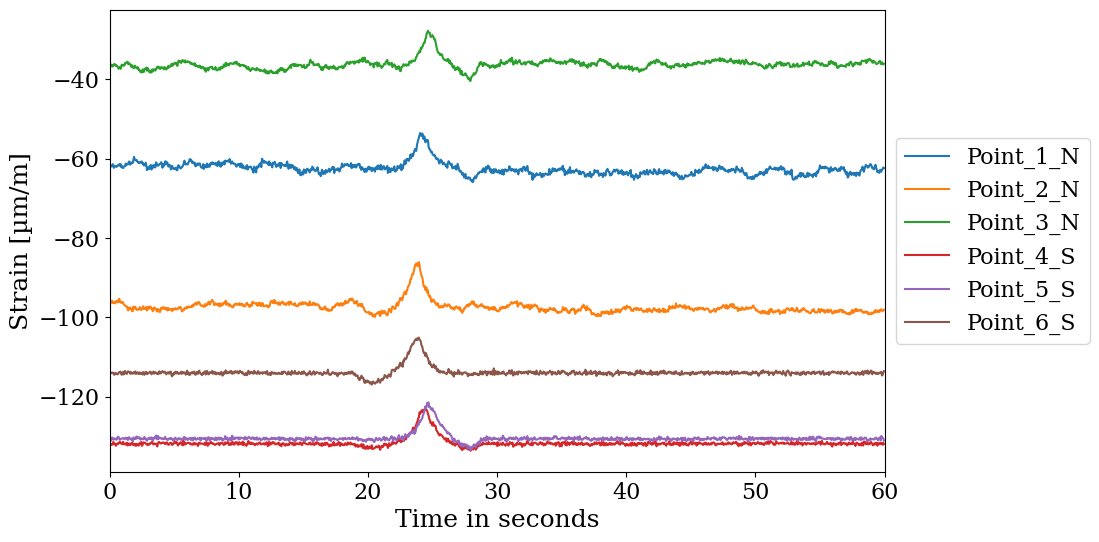

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with the path to your Parquet file
file_path = r'C:\Users\200408\repos\HeroysundBridge-ML-Assets\bronze\heroysund_sensors\2021\05\20210501085458.parquet'

# Read the Parquet file into a Pandas DataFrame
data = pd.read_parquet(file_path)

# Display the first few rows of the dataframe
display(data)

# Filter the first 20*60 = 1200 measurements
filtered_data = data.iloc[1800:1800+60*20]

# Create a time axis in seconds
time_axis = (filtered_data.index - filtered_data.index[0]) / 20

# Columns to be plotted (excluding Omega_N and Omega_S)
columns_to_plot = ['Point_1_N', 'Point_2_N', 'Point_3_N', 'Point_4_S', 'Point_5_S', 'Point_6_S']

# Plot all specified columns in the same plot
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(time_axis, filtered_data[column], label=column)

plt.xlabel('Time in seconds', fontsize=18)
plt.ylabel('Strain [µm/m]', fontsize=18)
plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 60)  # Set x-axis limits from 0 to 60 seconds
plt.grid(False)
plt.show()
